In [1]:
!nvidia-smi

Tue Feb  3 09:50:54 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   47C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 71.1 MB/s eta 0:00:00


In [3]:
import ultralytics
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()

ultralytics.checks()

Ultralytics 8.4.10 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.7/112.6 GB disk)


# Image Detection

In [4]:
# Get custom dataset
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="input-your-key-here")
project = rf.workspace("aiprojects-k0qt0").project("surfer-finder")
version = project.version(5)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 22.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.13.0.90
    Uninstalling opencv-python-headless-4.13.0.90:
      Successfully uninstalled opencv-python-headless-4.13.0.90
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Surfer-Finder-5 in yolov8:: 100%|██████████| 883/883 [00:00<00:00, 9955.11it/s]


# Train YOLOv8 Model

In [5]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/Surfer-Finder-5/data.yaml epochs=20 imgsz=640

Ultralytics 8.4.10 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Surfer-Finder-5/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspec

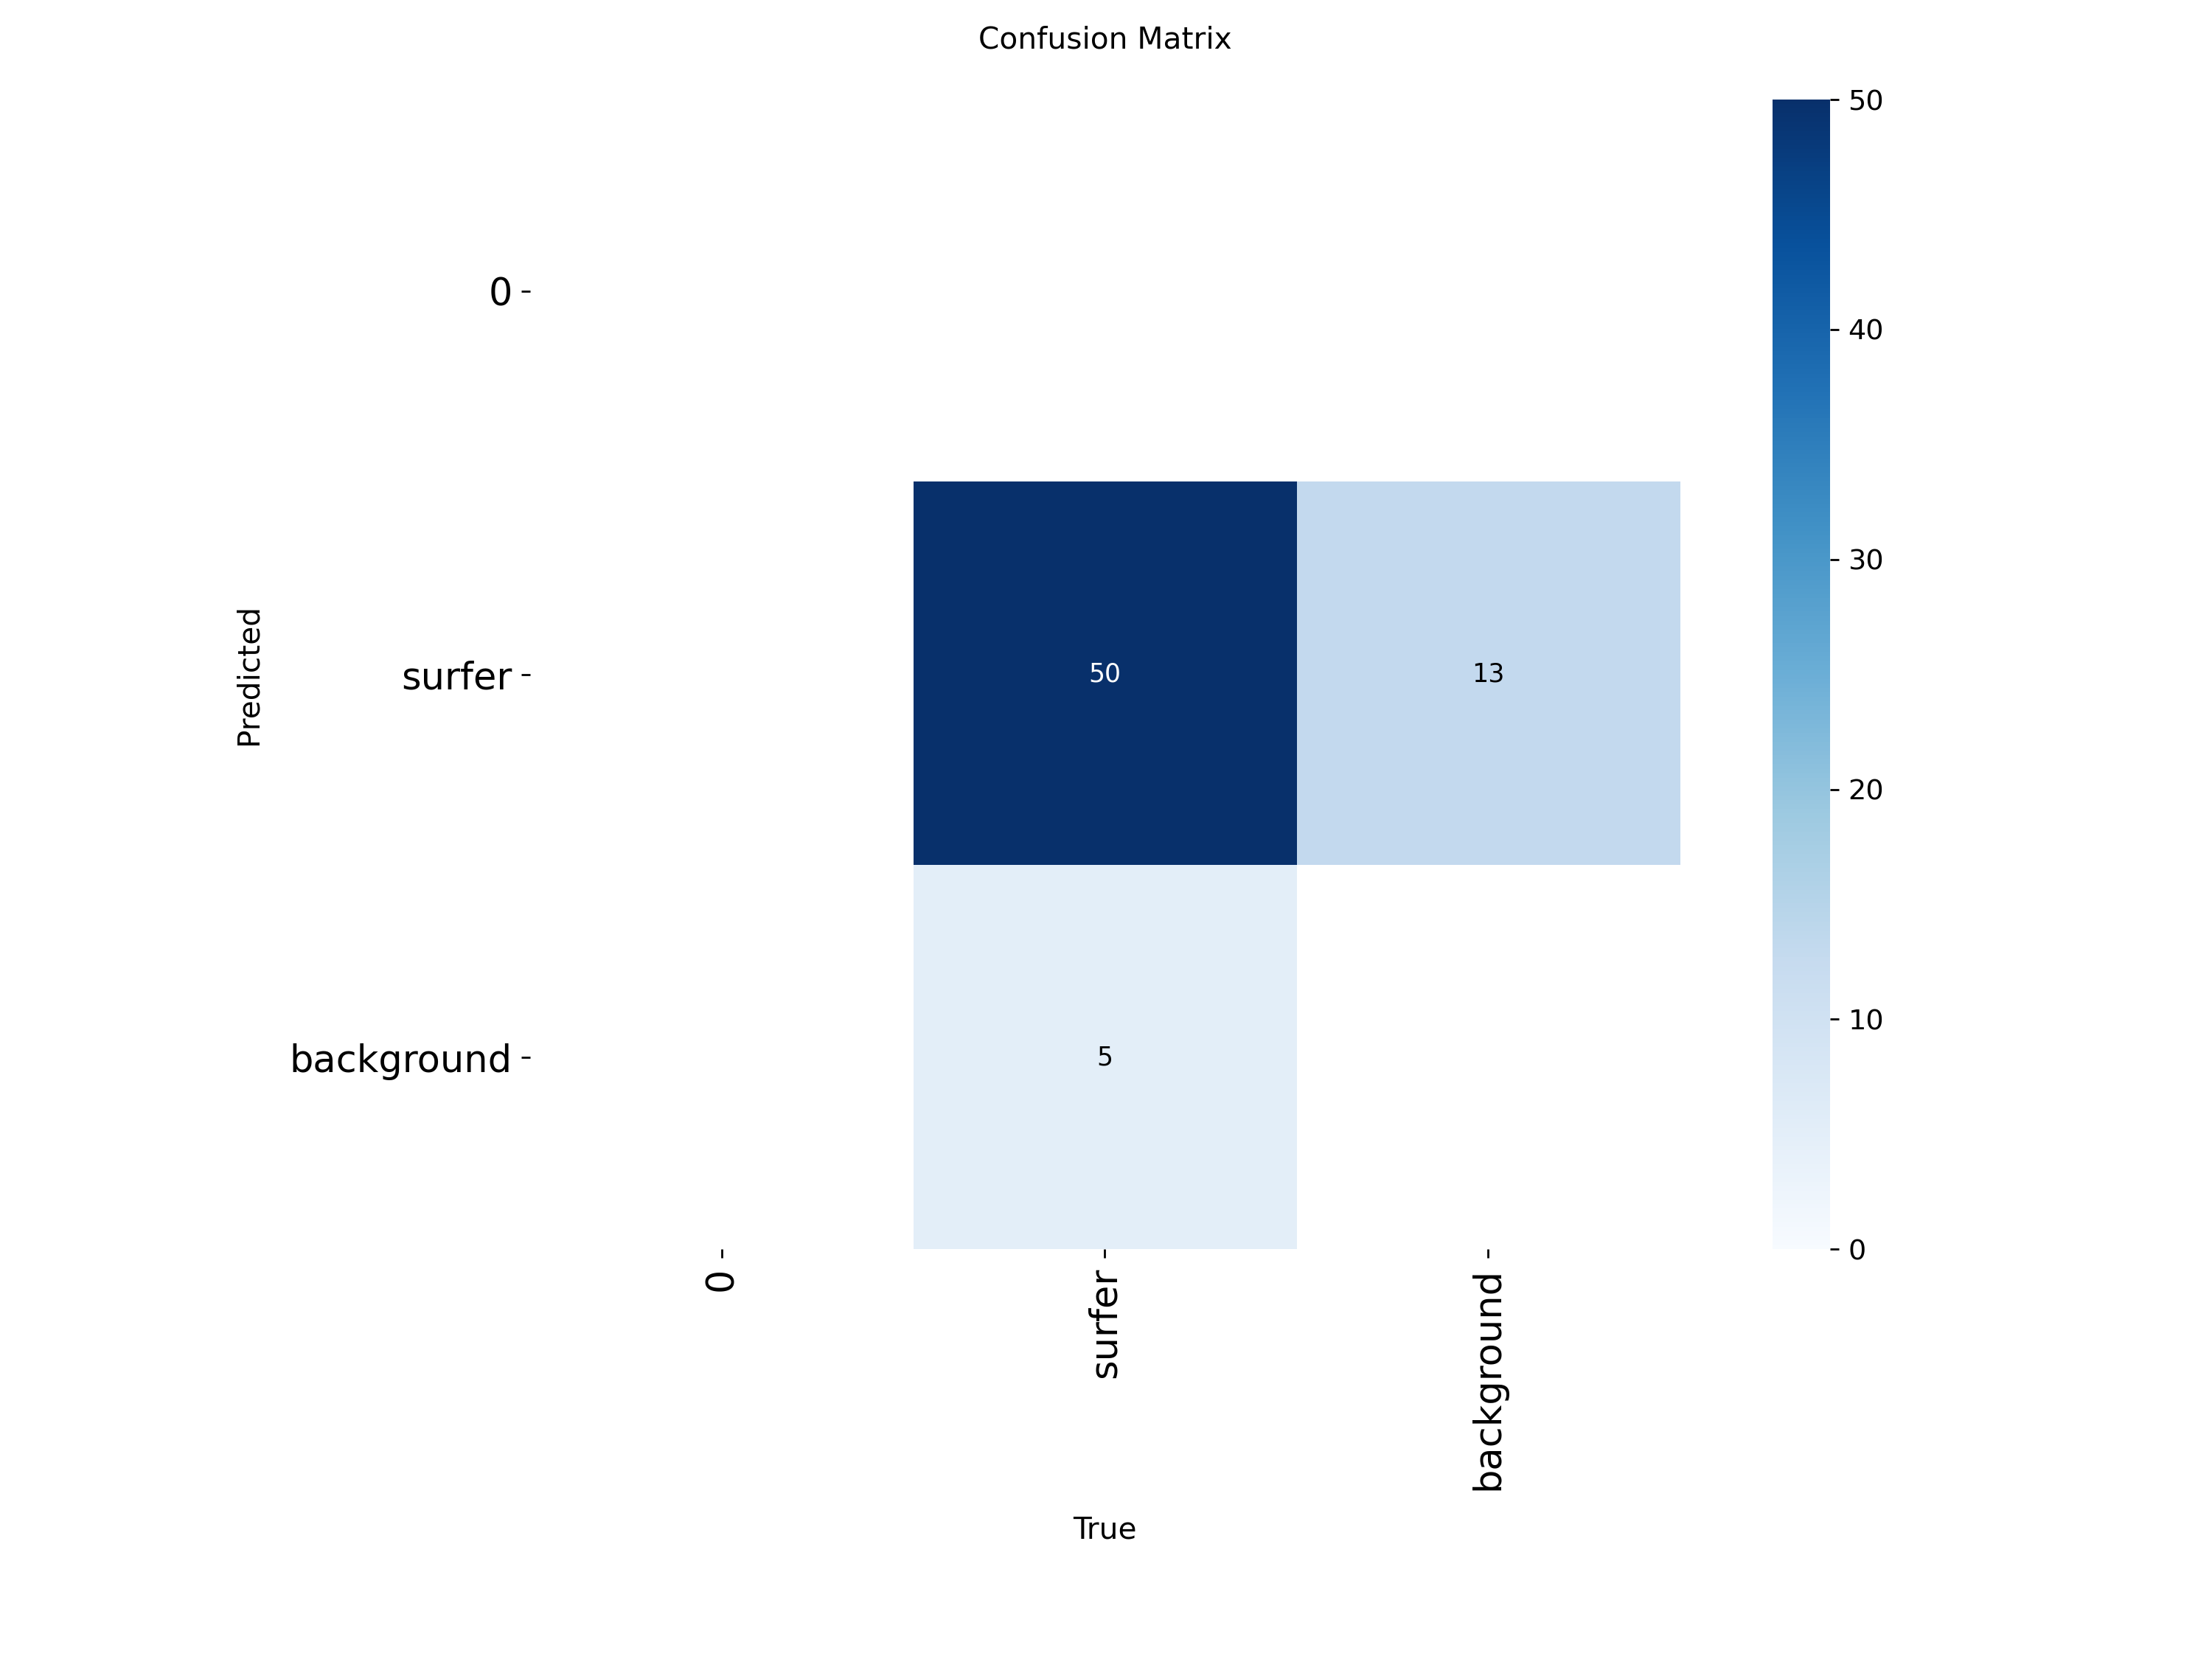

In [6]:
# Print confusion matrix
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=700)

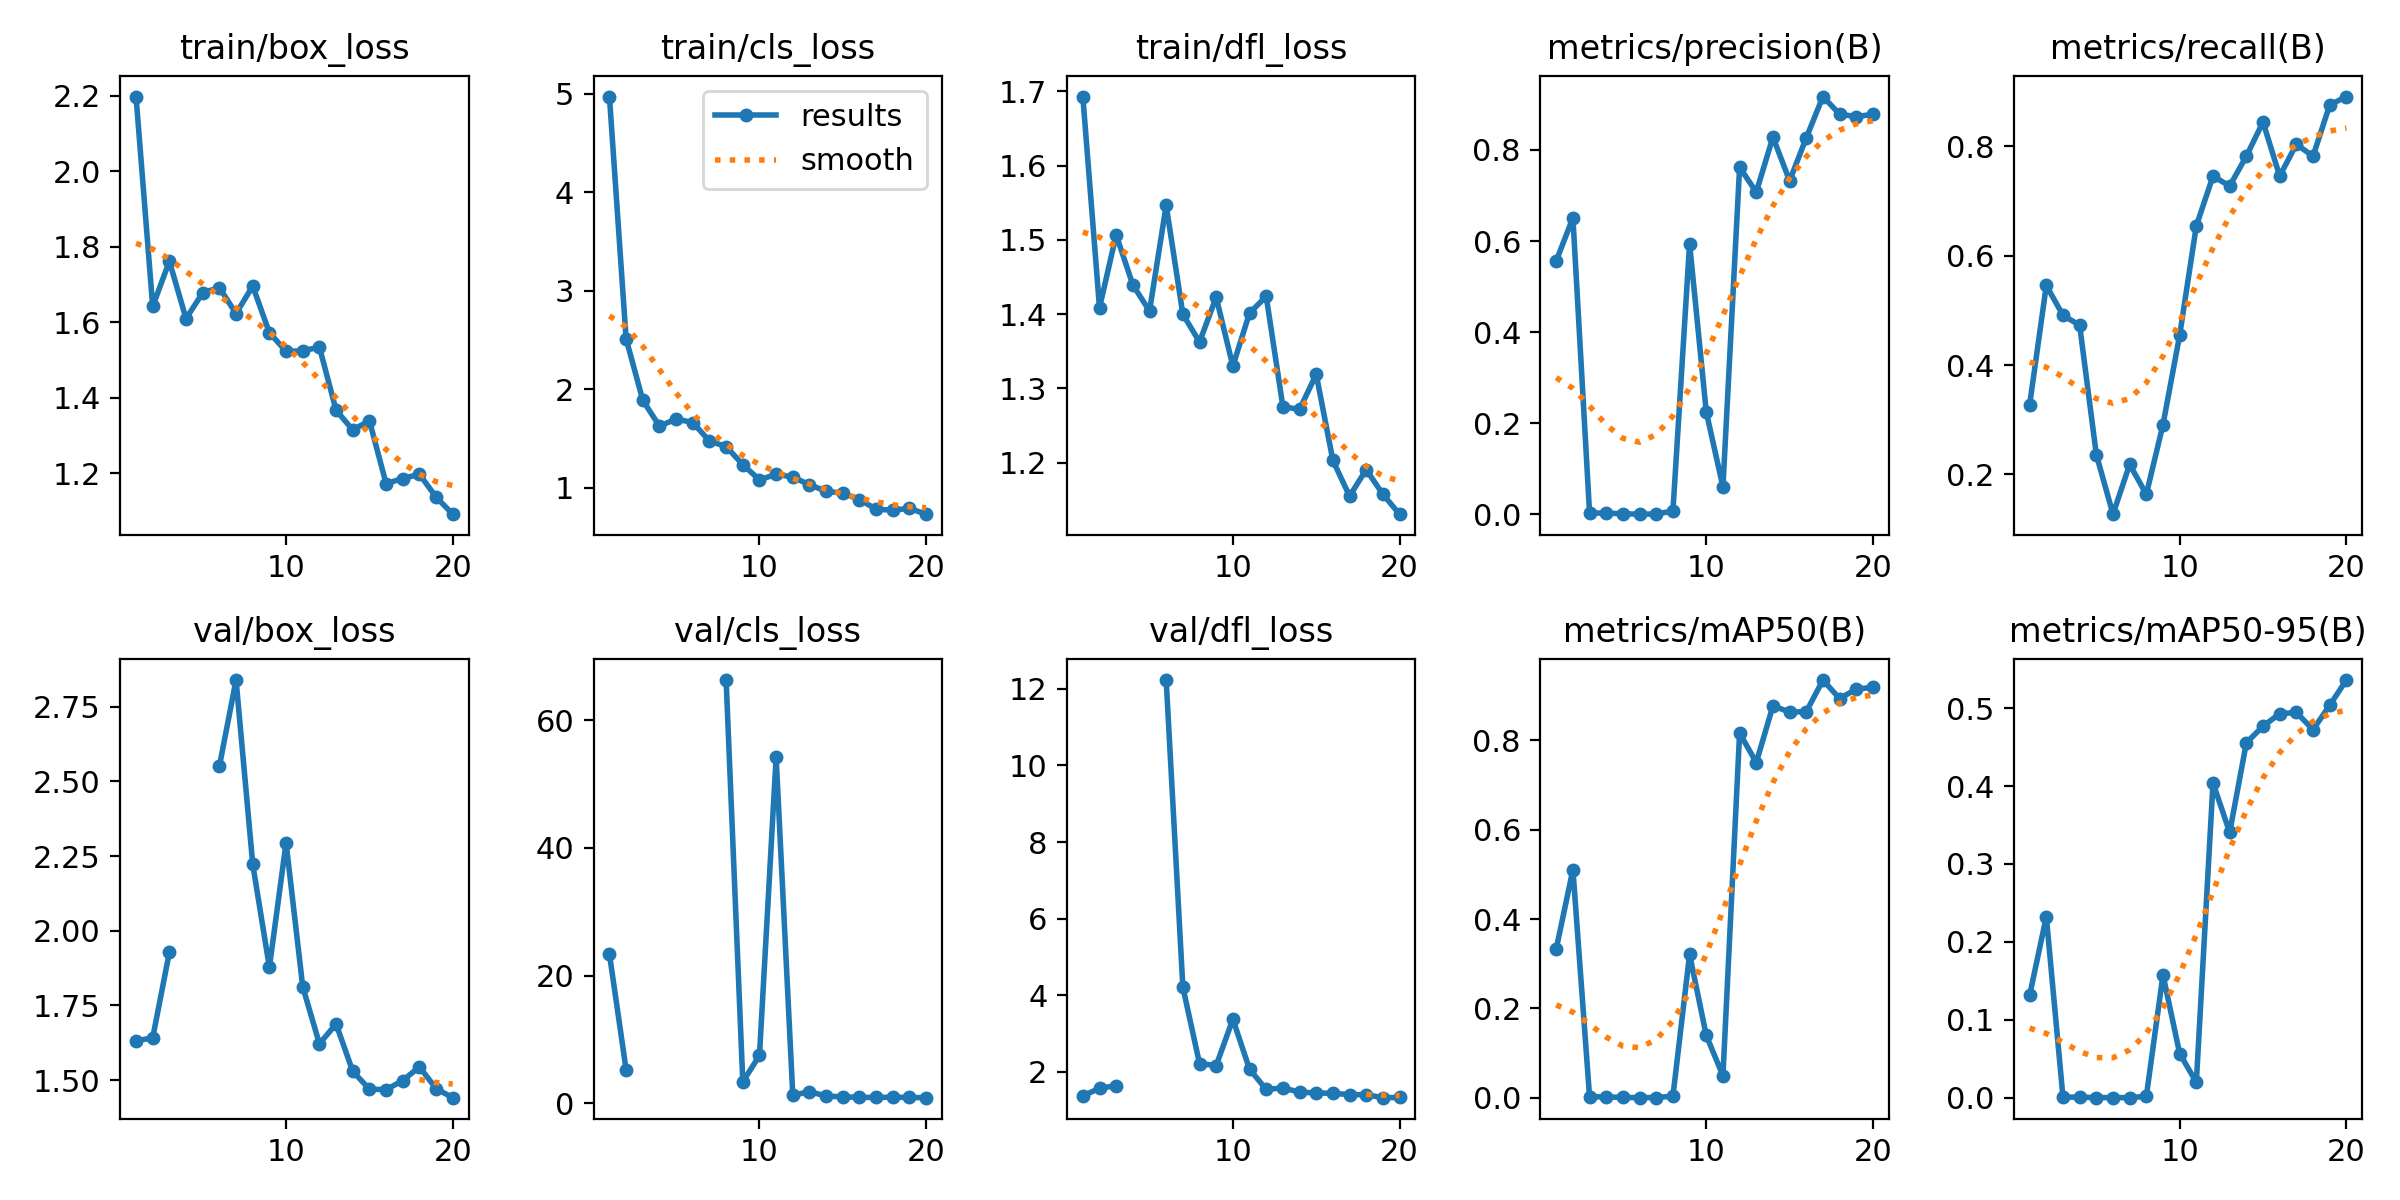

In [20]:
# Print train results
Image(filename=f'/content/runs/detect/train/results.png', width=900)

# Validate YOLOv8 Model

In [8]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=/content/Surfer-Finder-5/data.yaml

Ultralytics 8.4.10 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 93 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1688.5±423.8 MB/s, size: 38.5 KB)
val: Scanning /content/Surfer-Finder-5/valid/labels.cache... 49 images, 1 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 49/49 10.8Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 1.8it/s 2.2s
                   all         49         55      0.877      0.891      0.918      0.526
                surfer         48         55      0.877      0.891      0.918      0.526
Speed: 7.7ms preprocess, 27.3ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to /content/runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


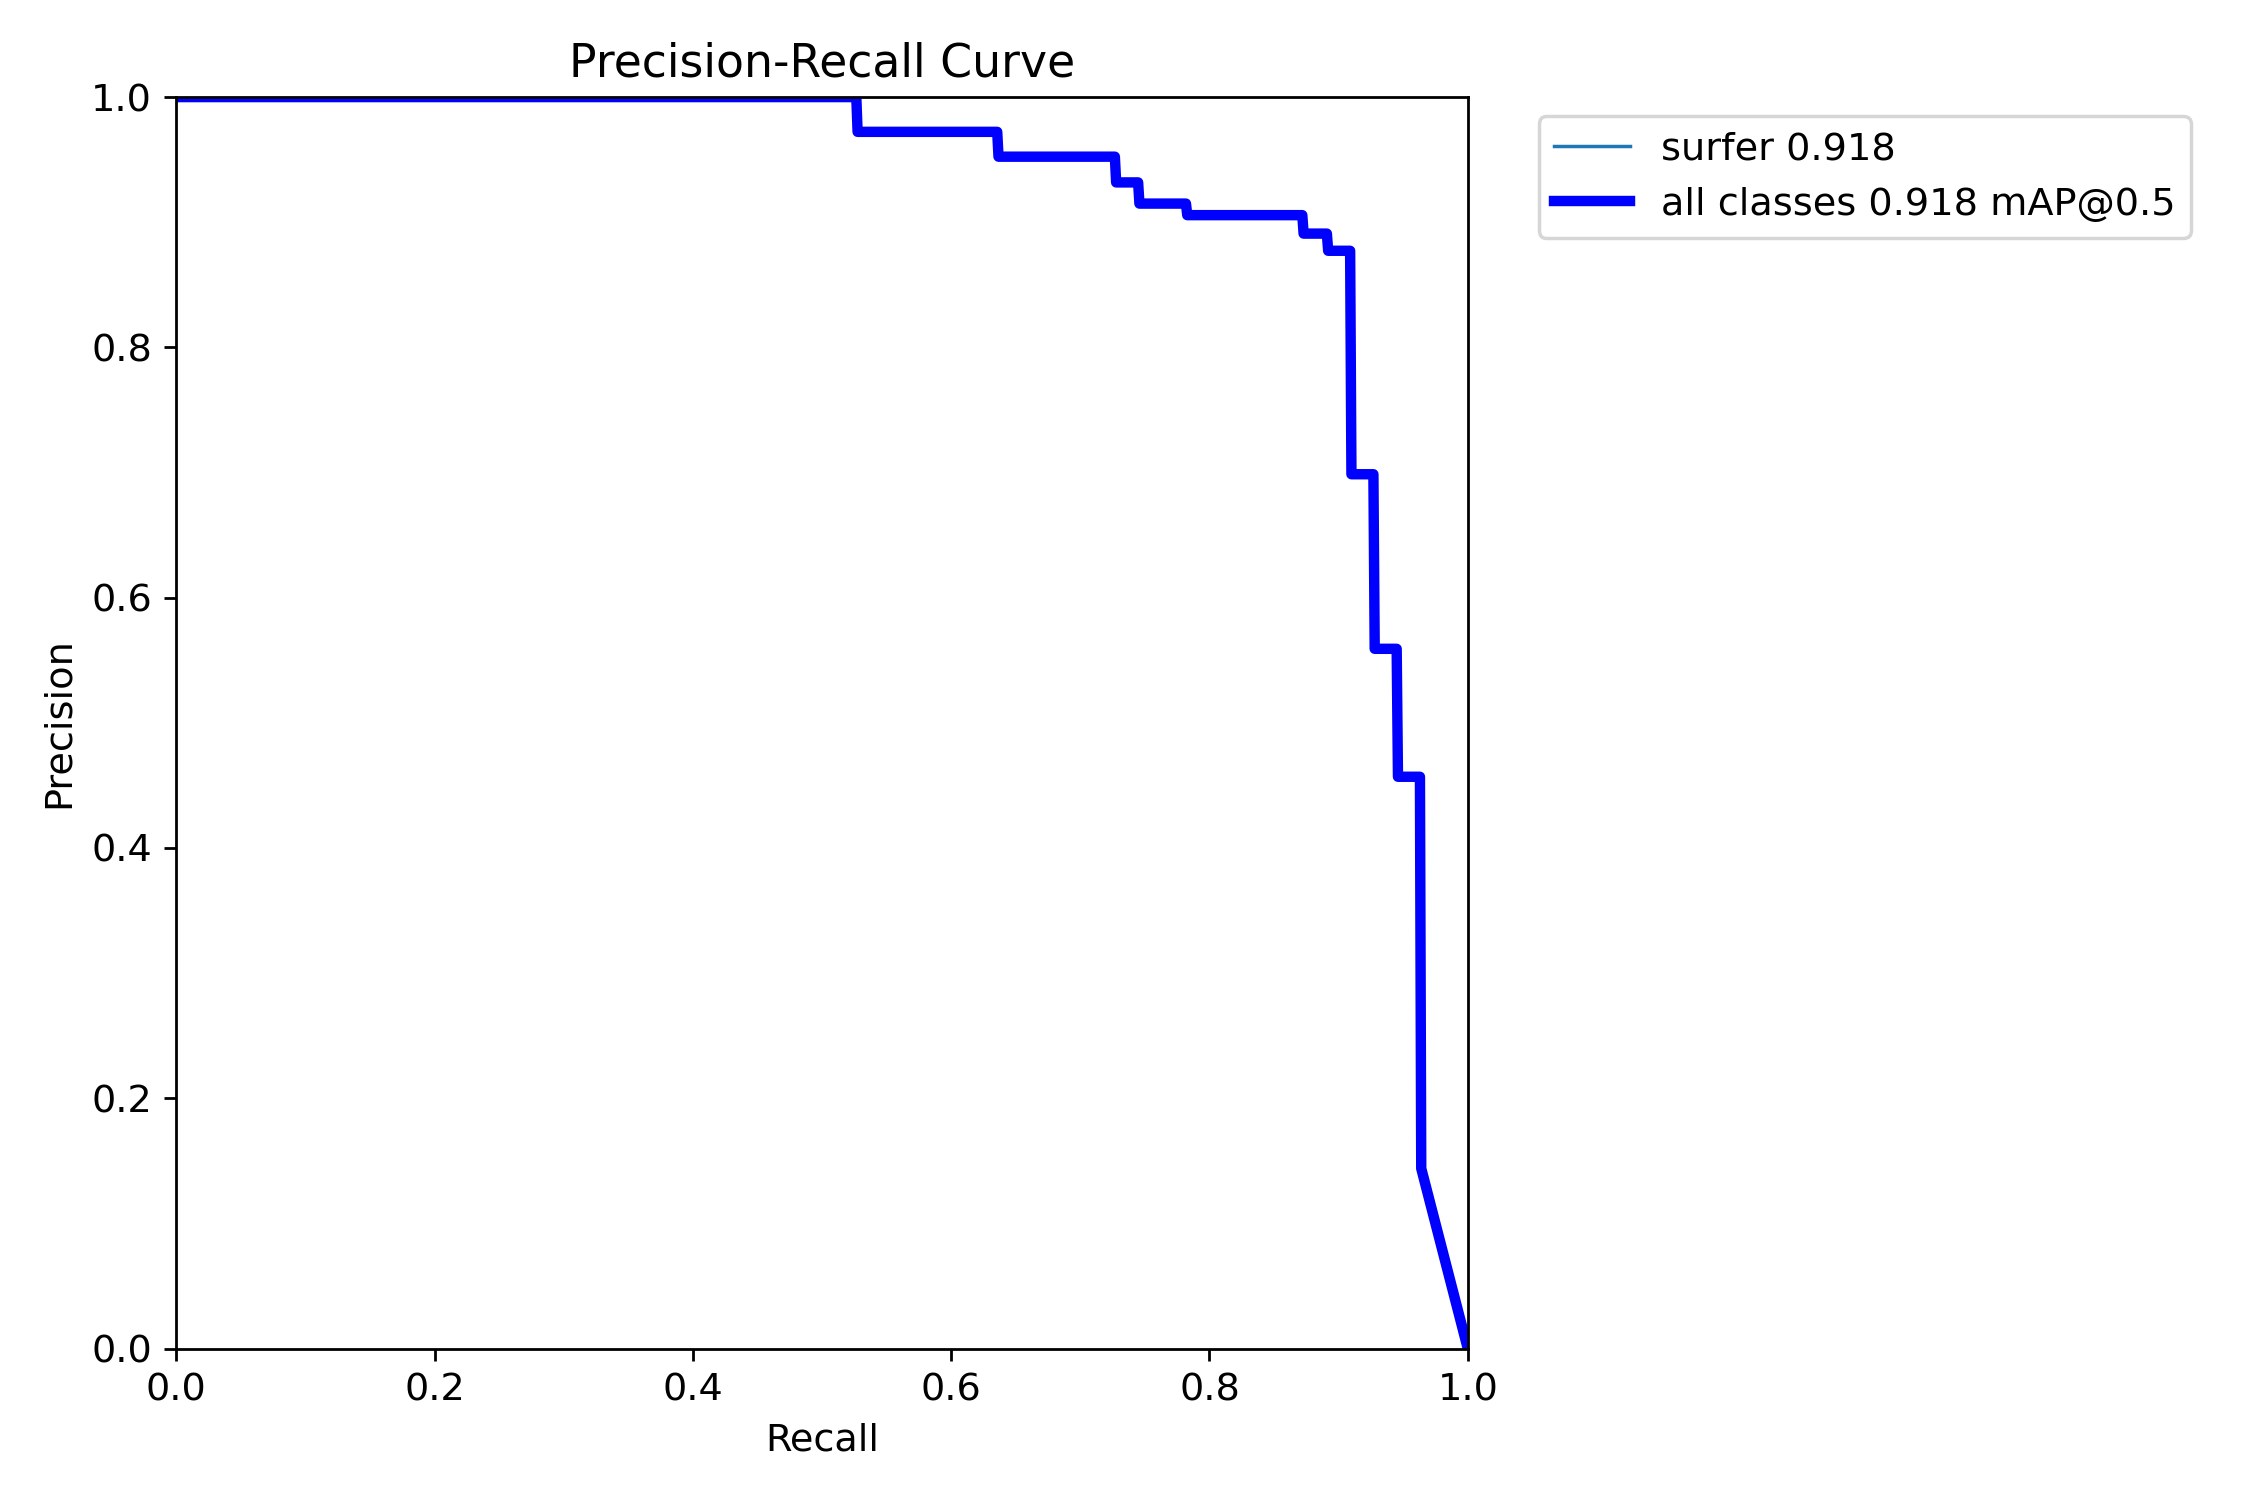

In [21]:
# Print Precision-Recall curve
Image(filename=f'/content/runs/detect/val/BoxPR_curve.png', width=600)

# Predict YOLOv8 Model

In [9]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.5 source=/content/Surfer-Finder-5/test/images

Ultralytics 8.4.10 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 93 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs

image 1/28 /content/Surfer-Finder-5/test/images/IMG_0530_mov-0_jpg.rf.c3f3ac8d7e2b952ac4030ccd3a93b829.jpg: 640x640 1 surfer, 37.1ms
image 2/28 /content/Surfer-Finder-5/test/images/IMG_0530_mov-12_jpg.rf.ec8111e2a8fb4e91e1cdf635dc4c0c33.jpg: 640x640 1 surfer, 37.0ms
image 3/28 /content/Surfer-Finder-5/test/images/IMG_0530_mov-1_jpg.rf.3bafd3b0376aaa2d821e7cddcc17cbe0.jpg: 640x640 1 surfer, 36.9ms
image 4/28 /content/Surfer-Finder-5/test/images/IMG_0530_mov-3_jpg.rf.48ecc8c1d44aa751555241165f750c02.jpg: 640x640 1 surfer, 36.9ms
image 5/28 /content/Surfer-Finder-5/test/images/IMG_0530_mov-72_jpg.rf.9bba1cde8b6c0218b99824e67e5d233f.jpg: 640x640 1 surfer, 29.9ms
image 6/28 /content/Surfer-Finder-5/test/images/IMG_0530_mov-76_jpg.rf.5fadc1b7cd1c7e93a08c657dd9774c8a.jpg: 640x640 1 surfer, 25.4ms
image 7/28 /content/Surfer-Finder-

# Display Image Results from Model

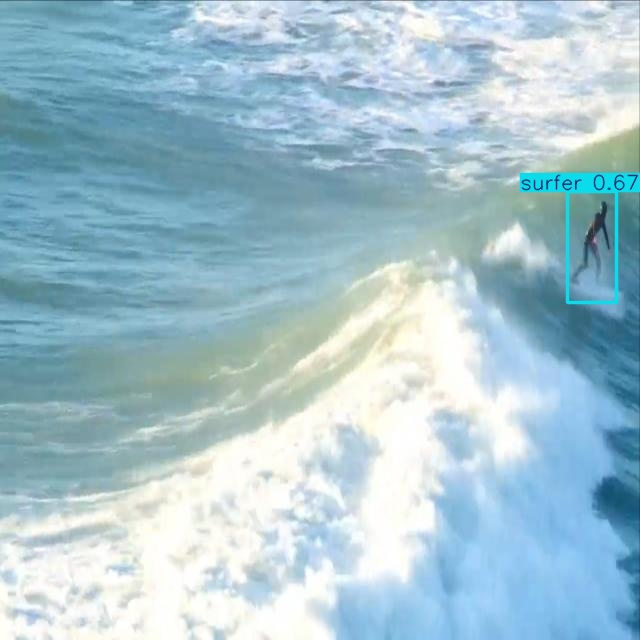

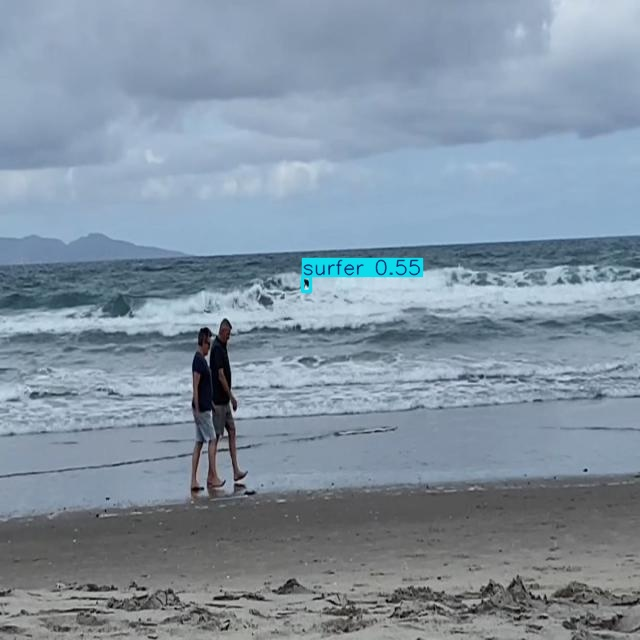

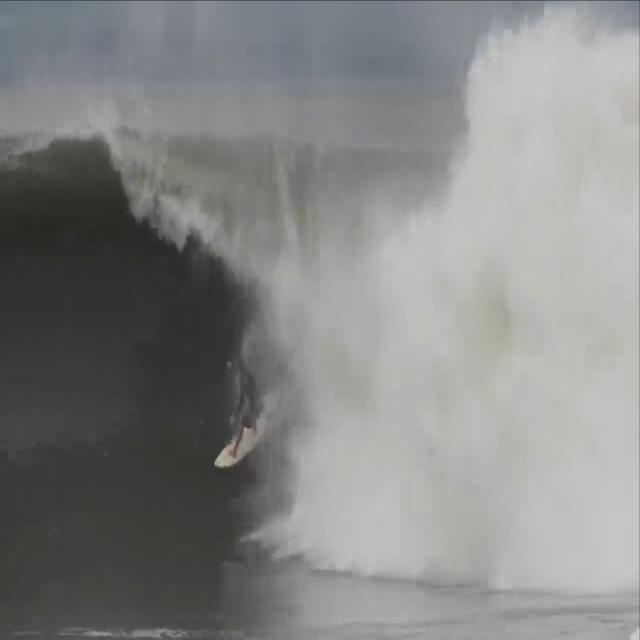

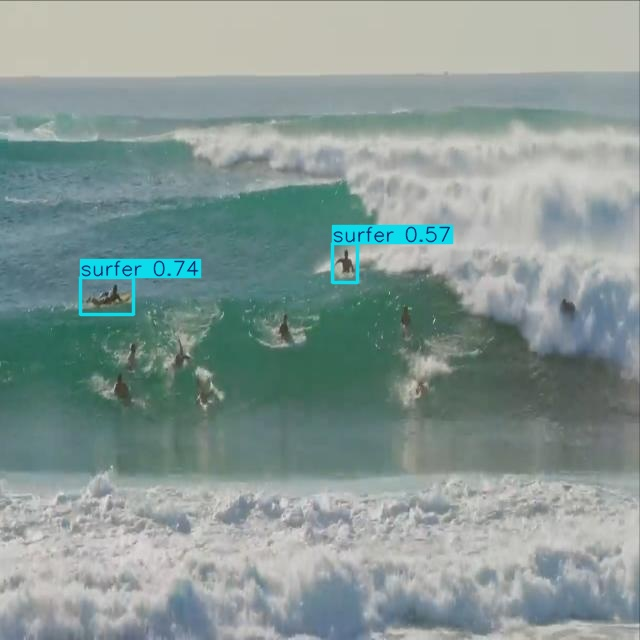

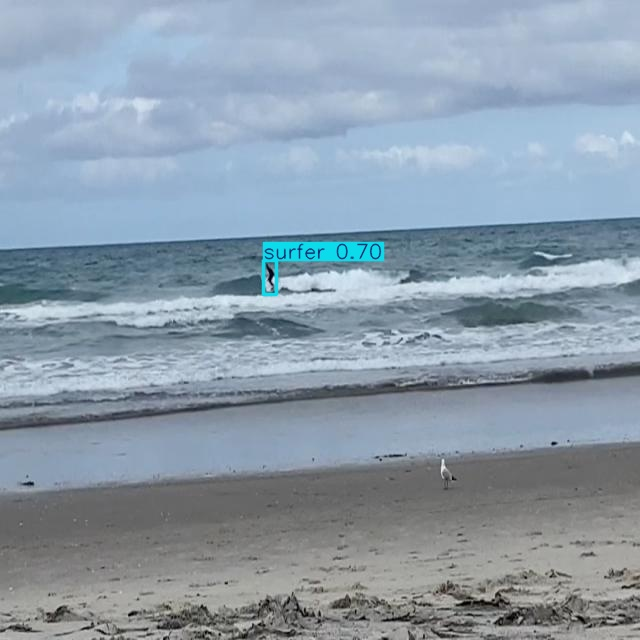

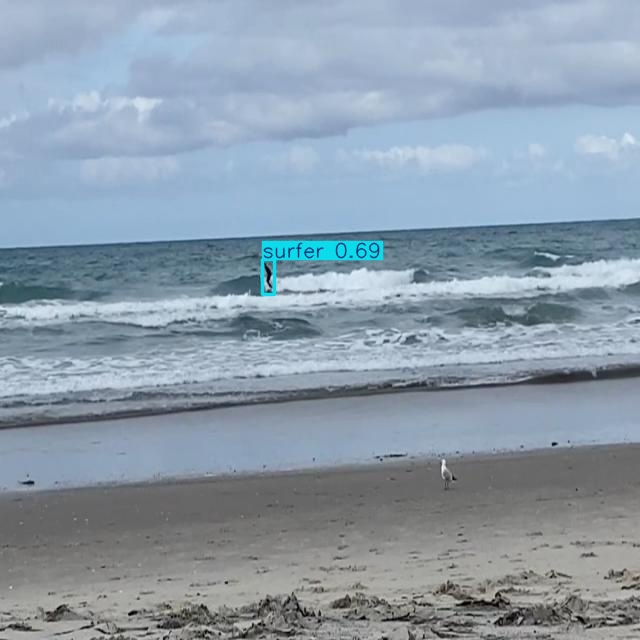

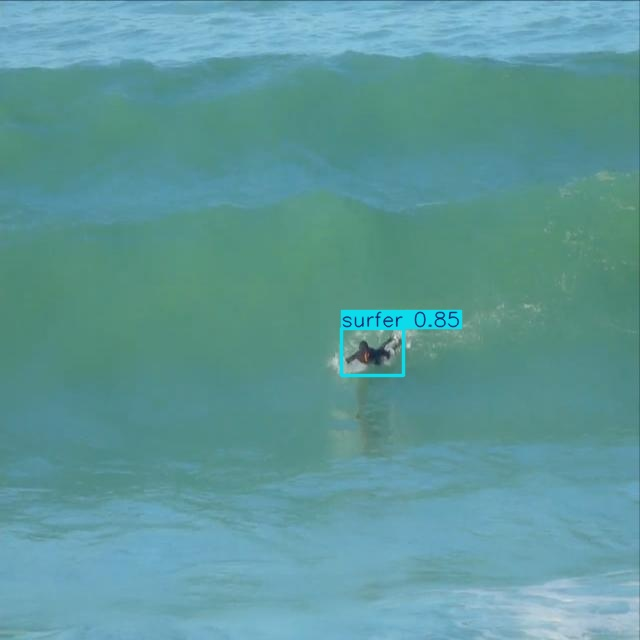

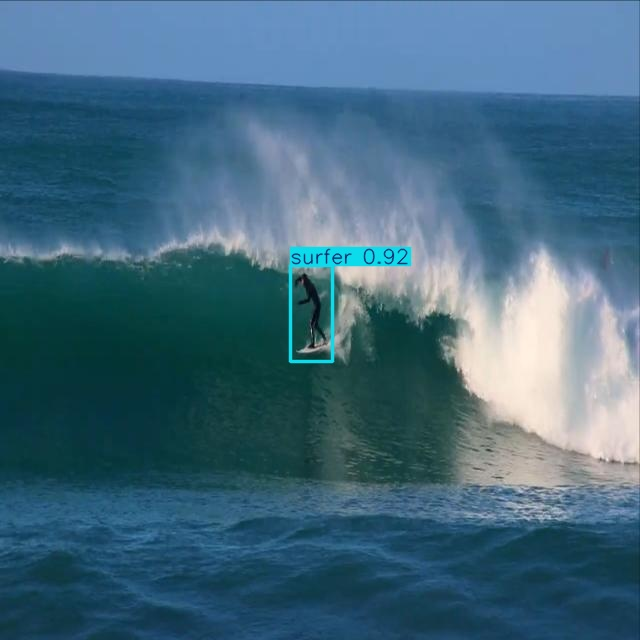

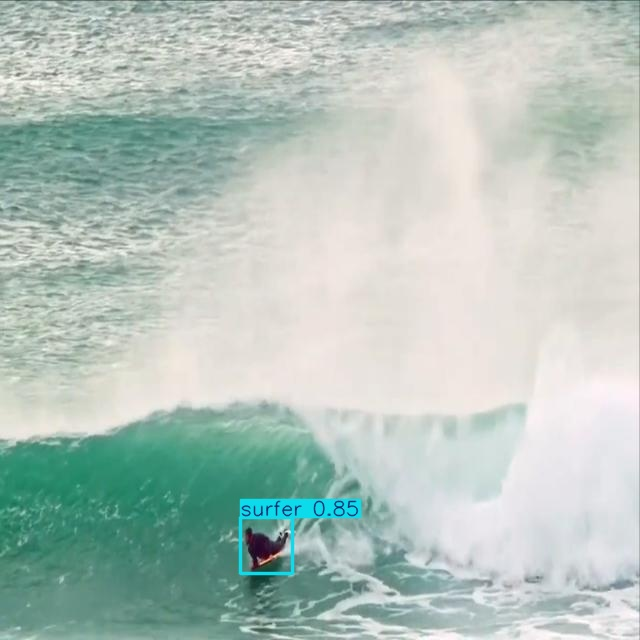

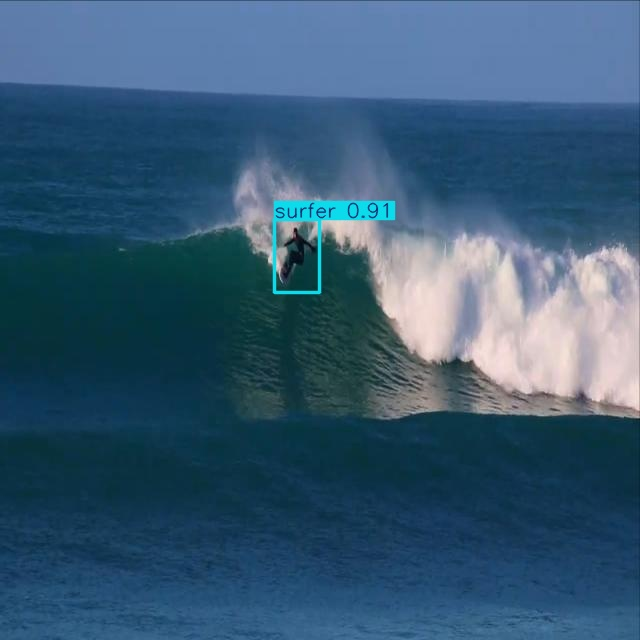

In [10]:
import glob
from IPython.display import Image, display

image_paths = glob.glob(f'/content/runs/detect/predict/*jpg')

# Show 10 results
for image_path in image_paths[:10]:
  display(Image(filename=image_path, height=400))
  print("\n")

# Video Detection

In [11]:
# Get the YouTube video
!pip install -U yt-dlp

!yt-dlp -f mp4 -o "/content/input_surfer.mp4" "https://youtu.be/51WNzklemd8?si=JK7mBpn-qCxV6oOA"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.0/182.0 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 123.7 MB/s eta 0:00:00
         Pre-merged mp4 formats are not available from all sites, or may only be available in lower quality.
         To prioritize the best h264 video and aac audio in an mp4 container, use "-t mp4" instead.
         If you know what you are doing and want a pre-merged mp4 format, use "-f b[ext=mp4]" instead to suppress this warning
[youtube] Extracting URL: https://youtu.be/51WNzklemd8?si=JK7mBpn-qCxV6oOA
[youtube] 51WNzklemd8: Downloading webpage
[youtube] 51WNzklemd8: Downloading android vr player API JSON
[info] 51WNzklemd8: Downloading 1 format(s): 18
[download] Destination: /content/input_surfer.mp4
[download] 100% of    1.44MiB in 00:00:00 at 1.96MiB/s


In [12]:
# Load the model
model = YOLO("runs/detect/train/weights/best.pt")

In [16]:
# Run prediction on video
model.predict(
    source="/content/input_surfer.mp4",
    conf=0.5,
    vid_stride=2,
    save=True
)


WARNING ⚠️ 
Inference results will accumulate in RAM unless `stream=True` is passed, which can cause out-of-memory errors for large
sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/250) /content/input_surfer.mp4: 384x640 (no detections), 26.1ms
video 1/1 (frame 2/250) /content/input_surfer.mp4: 384x640 (no detections), 25.0ms
video 1/1 (frame 3/250) /content/input_surfer.mp4: 384x640 (no detections), 24.9ms
video 1/1 (frame 4/250) /content/input_surfer.mp4: 384x640 (no detections), 24.9ms
video 1/1 (frame 5/250) /content/input_surfer.mp4: 384x640 (no detections), 24.9ms
video 1/1 (frame 6/250) /content/input_surf

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: '0', 1: 'surfer'}
 obb: None
 orig_img: array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0,

# Display Video Results from Model

In [17]:
# Convert avi to mp4
!ffmpeg -y \
-i runs/detect/predict2/input_surfer.avi \
-vcodec libx264 -pix_fmt yuv420p \
-acodec aac \
runs/detect/predict2/input_surfer.mp4

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [18]:
# Play the results video
from IPython.display import Video

Video("runs/detect/predict2/input_surfer.mp4", embed=True)